# Validaciones - Pobreza

#### Tablas 2010 - Personas - Total Pais

- Poblacion y porcentaje por Pobreza SI
- Poblacion y porcentaje por Indigencia SI


- Poblacion y porcentaje por Pobreza SI y AGLO SI
- Poblacion y porcentaje por Indigencia SI y AGLO SI


- Poblacion y porcentaje Por Pobreza SI y Aglomerado
- Poblacion y porcentaje Por Indigencia SI y Aglomerado


- Poblacion y porcentaje Por Pobreza SI y Provincia
- Poblacion y porcentaje Por Indigencia SI y Provincia



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

# path ='./../data/Pobreza/pobreza_' # use your path
path ='/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles[::]


def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('QS').mean().interpolate('linear').rolling(4, center = True).mean()


### Funcion para cargar G sheets

In [2]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from numpy import array, nan

def load_spreadsheet(key, worksheet = 0):

    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
             './../../../Desktop/fourth-stock-325317-605e9494d4f6.json', scope) # Your json file here

    gc = gspread.authorize(credentials)

    wks = gc.open_by_key(key).get_worksheet(worksheet)

    data = array(wks.get_all_values())

    return data


In [3]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [4]:
df_list = []
for f in allFiles[::]:
    print(f)
    
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['Pobreza', 'Indigencia']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-11-15.csv
/media/mig

In [5]:
# Stats a nivel Hogar

mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles[::]:
    print(f)
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['Pobreza', 'Indigencia']
#     vars_ = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']

    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q'] + groupers + vars_)
    data = data.drop_duplicates()
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
#     data = data.loc[data.AGLOMERADO != 0]
    data['Total'] = True
        
#     data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Hogares'
    out = sums.reset_index()

    df_list += [out]
    
dfH = pd.concat(df_list)
dfH['Q'] = pd.to_datetime(dfH['Q'])
dfH10 = dfH.loc[dfH.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-02-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-05-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-11-15.csv
/media/mig

In [6]:
# Index(['index', 'RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
#        'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
#        'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
#        'INGRESO_SBS', 'PP07K', 'P47T_persona', 'ANO4', 'Q', 'P0910',
#        'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
#        'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
#        'Pobreza_5usd', 'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV',
#        'NOMPROV', 'AGLOMERADO', 'Region'],
#       dtype='object')

## Personas. Total Pais. Poblacion por condicion de Pobreza / Indigencia

In [7]:
data = df10

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### Pobreza

,Cantidad,Porcentaje
Pobreza,,
False,28556650.0,71.4
True,11413750.0,28.6
TOTAL,39970400.0,100.0


### Indigencia

,Cantidad,Porcentaje
Indigencia,,
False,36763650.0,92.0
True,3206750.0,8.0
TOTAL,39970400.0,100.0


## Por AGLO SI/NO

In [8]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'AGLO_si'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e6, 2), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (mill.)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'AGLO_si'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_)

### Pobreza

Cantidad (mill.)        Porcentaje (%)       
AGLO_si            False   True          False   True
Pobreza                                              
False               9.38  19.18           63.5   76.1
True                5.38   6.03           36.5   23.9
TOTAL              14.76  25.21          100.0  100.0

### Indigencia

Cantidad (mill.)        Porcentaje (%)       
AGLO_si               False   True          False   True
Indigencia                                              
False                 13.05  23.71           88.5   94.0
True                   1.70   1.50           11.5    6.0
TOTAL                 14.75  25.21          100.0  100.0

## En Aglomerados. Serie de Tiempo

### Pobreza.

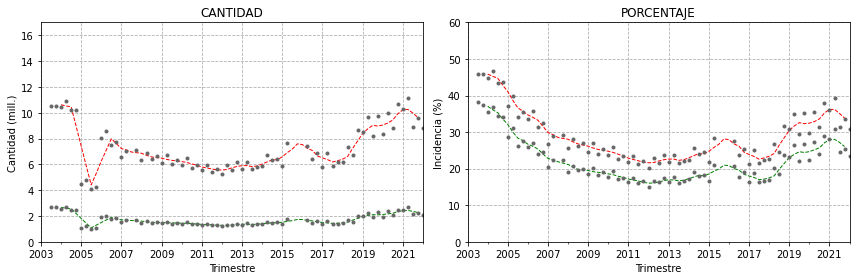

### Indigencia.

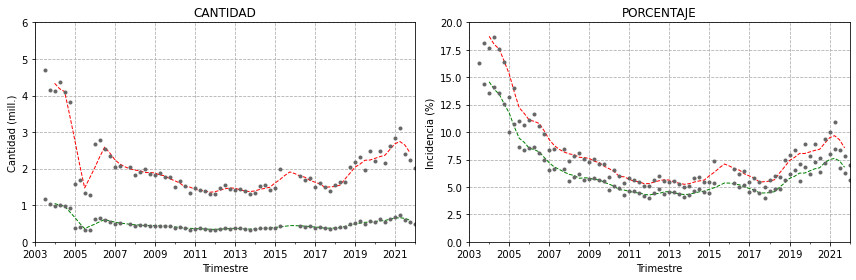

In [9]:

for j, col in enumerate(['Pobreza', 'Indigencia']):
    display(Markdown('### '+col+'.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    
    for i, data in enumerate([df, dfH]):

        data = data.loc[(data.AGLO_si == True)]

        table = data.groupby(['Q', col])[['Personas', 'Hogares'][i]].sum().unstack()
        table = table/1e6
        table_pct = 100*table.div(table.sum(1), axis = 0)

        ax = axs[1]
        ax.set_title('PORCENTAJE')
        moving_avg(table_pct[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table_pct[True].plot(ax =ax, marker = '.', lw = 0, color = '.4')
        ax.grid(linestyle = '--')
        ax.set_xlim('2003', '2022')
        ax.set_ylim(0, [60, 20][j])
        ax.set_xlabel('Trimestre')
        ax.set_ylabel('Incidencia (%)')    

        ax = axs[0]
        ax.set_title('CANTIDAD')
        moving_avg(table[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table[True].plot(ax = ax, marker = '.', lw = 0, color = '.4')
        ax.grid(linestyle = '--')
        ax.set_xlim('2003', '2022')
        ax.set_ylim(0, [17, 6][j])
        ax.set_xlabel('Trimestre')
        ax.set_ylabel('Cantidad (mill.)')

    plt.tight_layout()
    plt.savefig('./../images/pobreza1_'+col+'.png')
    plt.show()

## Comparacion con Fuentes alternativas

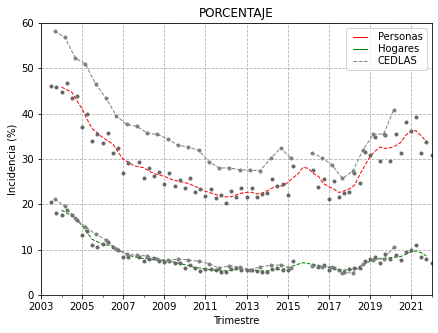

In [10]:
data = df.loc[(df.AGLO_si == True)]

fig, ax = plt.subplots(1, figsize = (7, 5))

colors = ['r', 'g']
### Serie propia
for i, col in enumerate(['Pobreza', 'Indigencia']):
    table = data.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)

    moving_avg(table_pct[True]).plot(ax = ax, lw = 1, color = colors[i], linestyle = '--')
    table_pct[True].plot(ax =ax, marker = '.', lw = 0, color = '.4')

### serie CEDLAS
cedlas = pd.read_csv('./../data/info/CEDLAS.csv', decimal=',')
cedlas.index = pd.date_range(start = '2003-09-01', periods=len(cedlas), freq = '6M')
cedlas = cedlas[['Pobreza', 'Indigencia']].astype(float)

cedlas.plot(ax = ax, color = '.5', linestyle = '--', lw = 1, marker = '.')


## Plot format

# ax = axs[1]
ax.set_title('PORCENTAJE')
ax.grid(linestyle = '--')
ax.set_xlim('2003', '2022')
ax.set_ylim(0, 60)
ax.set_xlabel('Trimestre')
ax.set_ylabel('Incidencia (%)')    

# Leyenda
pts1 = mlines.Line2D([], [], color=colors[0], lw = 1, label='Personas')
pts2 = mlines.Line2D([], [], color=colors[1], lw = 1, label='Hogares')
cedlas = mlines.Line2D([], [], color = '.5', linestyle = '--', lw = 1, label='CEDLAS')
ax.legend(handles=[pts1, pts2, cedlas], numpoints = 3, labelspacing = .2)

plt.savefig('./../images/pobreza2.png')
plt.show()

## Total Pais. Serie de Tiempo

### Pobreza.

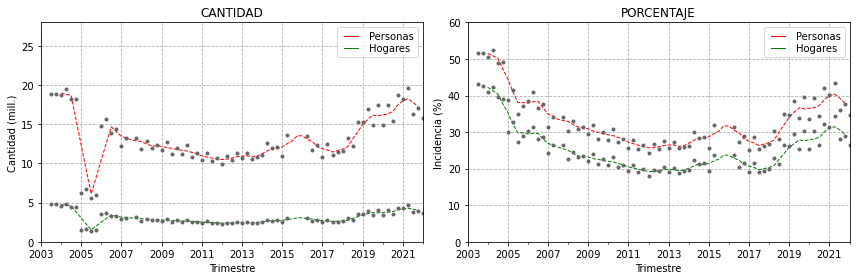

### Indigencia.

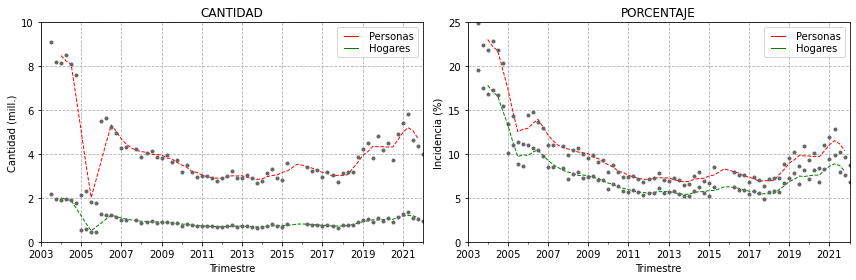

In [11]:

for j, col in enumerate(['Pobreza', 'Indigencia']):
    display(Markdown('### '+col+'.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    
    for i, data in enumerate([df, dfH]):

#         data = data.loc[(data.AGLO_si == True)]

        table = data.groupby(['Q', col])[['Personas', 'Hogares'][i]].sum().unstack()
        table = table/1e6
        table_pct = 100*table.div(table.sum(1), axis = 0)

        ax = axs[1]
        ax.set_title('PORCENTAJE')
        moving_avg(table_pct[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table_pct[True].plot(ax =ax, marker = '.', lw = 0, color = '.4')
        ax.set_ylim(0, [60, 25][j])
        ax.set_ylabel('Incidencia (%)')    

        ax = axs[0]
        ax.set_title('CANTIDAD')
        moving_avg(table[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table[True].plot(ax = ax, marker = '.', lw = 0, color = '.4')
        ax.set_ylim(0, [28, 10][j])
        ax.set_ylabel('Cantidad (mill.)')

        # Leyenda
        pts1 = mlines.Line2D([], [], color=colors[0], lw = 1, label='Personas')
        pts2 = mlines.Line2D([], [], color=colors[1], lw = 1, label='Hogares')
#         cedlas = mlines.Line2D([], [], color = '.5', linestyle = '--', lw = 1, label='CEDLAS')
        for ax in axs:
            ax.grid(linestyle = '--')
            ax.set_xlim('2003', '2022')
            ax.set_xlabel('Trimestre')
            ax.legend(handles=[pts1, pts2], numpoints = 3, labelspacing = .2)

    plt.tight_layout()
    plt.savefig('./../images/pobreza3_'+col+'.png')
    plt.show()

## Por AGLOMERADOS

In [12]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'NOMAGLO'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e3, 1), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (miles)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'AGLOMERADO'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_.stack(0).T)

### Pobreza

Pobreza                       False                            True  \
                   Cantidad (miles) Porcentaje (%) Cantidad (miles)   
AGLOMERADO                                                            
Bahia Blanca                  229.7           79.9             57.6   
CABA                         2611.3           90.8            264.5   
Catamarca                     122.8           67.1             60.2   
Cdro Rivadavia                135.5           88.7             17.3   
Concordia                      99.6           64.3             55.2   
Cordoba                      1112.4           76.3            345.2   
Corrientes                    223.3           63.6            128.0   
Formosa                       127.8           56.7             97.4   
Fuera de aglom.              9375.5           63.5           5379.4   
GBA                          7906.9           74.6           2690.6   
Jujuy                         203.7           68.5             93.9   
La Plata                      631.8           80.2            155.6   
La Rioja                      112.8           63.7             64.4   
Mar del Plata                 473.6           79.4            122.6   
Mendoza                       712.2           76.4            220.3   
Neuquen                       267.2           80.7             64.0   
Parana                        211.1           78.2             58.8   
Posadas                       192.2           63.7            109.7   
Rawson-Trelew                  91.0           78.0             25.7   
Resistencia                   243.6           63.4            140.4   
Rio Cuarto                    124.0           77.6             35.8   
Rio Gallegos                   89.5           90.6              9.3   
Rosario                       935.5           77.7            269.2   
Salta                         381.1           70.3            161.1   
San Juan                      252.2           61.8            155.9   
San Luis                      126.2           72.3             48.2   
San Nicolas                   130.4           74.6             44.3   
Santa Fe                      347.2           72.7            130.6   
Santa Rosa                     90.5           82.7             18.9   
Sgo del Estero                238.0           66.6            119.2   
Tucuman                       596.2           70.8            246.0   
Ushuaia-Rio Grande             98.8           92.5              8.0   
Viedma-Patagones               62.9           79.4             16.3   

Pobreza                                      TOTAL                 
                   Porcentaje (%) Cantidad (miles) Porcentaje (%)  
AGLOMERADO                                                         
Bahia Blanca                 20.1            287.3          100.0  
CABA                          9.2           2875.8          100.0  
Catamarca                    32.9            183.0          100.0  
Cdro Rivadavia               11.3            152.8          100.0  
Concordia                    35.7            154.8          100.0  
Cordoba                      23.7           1457.6          100.0  
Corrientes                   36.4            351.3          100.0  
Formosa                      43.3            225.2          100.0  
Fuera de aglom.              36.5          14754.9          100.0  
GBA                          25.4          10597.5          100.0  
Jujuy                        31.5            297.6          100.0  
La Plata                     19.8            787.4          100.0  
La Rioja                     36.3            177.2          100.0  
Mar del Plata                20.6            596.2          100.0  
Mendoza                      23.6            932.5          100.0  
Neuquen                      19.3            331.2          100.0  
Parana                       21.8            269.9          100.0  
Posadas                      36.3            301.9          100.0  
Rawson-Trelew  

### Indigencia

Indigencia                    False                            True  \
                   Cantidad (miles) Porcentaje (%) Cantidad (miles)   
AGLOMERADO                                                            
Bahia Blanca                  274.0           95.4             13.3   
CABA                         2803.2           97.5             72.6   
Catamarca                     165.8           90.5             17.3   
Cdro Rivadavia                147.8           96.7              5.0   
Concordia                     140.3           90.6             14.6   
Cordoba                      1377.5           94.5             80.0   
Corrientes                    309.4           88.1             41.9   
Formosa                       200.1           88.8             25.2   
Fuera de aglom.             13050.7           88.5           1704.2   
GBA                          9967.0           94.1            630.5   
Jujuy                         271.2           91.1             26.4   
La Plata                      749.4           95.2             38.0   
La Rioja                      166.6           94.0             10.6   
Mar del Plata                 567.4           95.2             28.9   
Mendoza                       884.4           94.8             48.0   
Neuquen                       317.1           95.7             14.1   
Parana                        257.2           95.3             12.6   
Posadas                       267.2           88.5             34.6   
Rawson-Trelew                 110.0           94.2              6.8   
Resistencia                   341.0           88.8             43.0   
Rio Cuarto                    152.0           95.1              7.8   
Rio Gallegos                   95.8           97.0              3.0   
Rosario                      1136.3           94.3             68.4   
Salta                         498.1           91.9             44.1   
San Juan                      366.7           89.9             41.4   
San Luis                      163.0           93.4             11.5   
San Nicolas                   163.6           93.6             11.1   
Santa Fe                      437.7           91.6             40.0   
Santa Rosa                    105.0           95.9              4.4   
Sgo del Estero                323.4           90.5             33.8   
Tucuman                       772.8           91.8             69.3   
Ushuaia-Rio Grande            105.8           99.1              1.0   
Viedma-Patagones               75.9           95.8              3.3   

Indigencia                                   TOTAL                 
                   Porcentaje (%) Cantidad (miles) Porcentaje (%)  
AGLOMERADO                                                         
Bahia Blanca                  4.6            287.3          100.0  
CABA                          2.5           2875.8          100.0  
Catamarca                     9.5            183.1          100.0  
Cdro Rivadavia                3.3            152.8          100.0  
Concordia                     9.4            154.9          100.0  
Cordoba                       5.5           1457.5          100.0  
Corrientes                   11.9            351.3          100.0  
Formosa                      11.2            225.3          100.0  
Fuera de aglom.              11.5          14754.9          100.0  
GBA                           5.9          10597.5          100.0  
Jujuy                         8.9            297.6          100.0  
La Plata                      4.8            787.4          100.0  
La Rioja                      6.0            177.2          100.0  
Mar del Plata                 4.8            596.3          100.0  
Mendoza                       5.2            932.4          100.0  
Neuquen                       4.3            331.2          100.0  
Parana                        4.7            269.8          100.0  
Posadas                      11.5            301.8          100.0  
Rawson-Trelew  

## Comparacion con INDEC

In [13]:
### Data INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=3)

df_ = pd.DataFrame(datos)
df_, df_.columns = df_[1:] , df_.iloc[0]
# Set index
df_ = df_.set_index(['AGLO_ID', 'AGLOMERADO', 'NOMAGLO', 'Q'])
df_.columns.name = 'Cant. Pers.'

df_ = df_.astype(float)

## Year avg:
df_ = df_.reset_index()
tabla_indec = df_.groupby(['AGLOMERADO', 'NOMAGLO']).mean()

In [14]:
### Data MI
data = df10; col = 'Pobreza'
tabla = data.groupby(['Q', 'AGLOMERADO', 'NOMAGLO', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

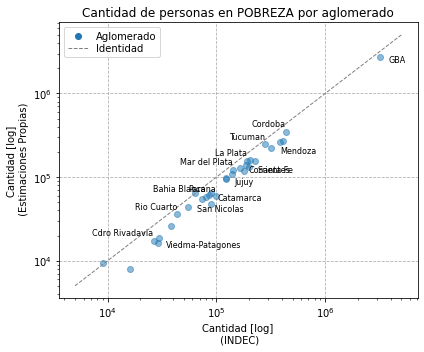

In [15]:
info = pd.concat([tabla_indec['pobreza_sum'], tabla[True]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
info.index = info.index.droplevel(0)

fig, ax = plt.subplots(1, figsize = (6, 5))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = ax, alpha = .5)

ax.plot([5e3, 5e6], [5e3, 5e6], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('INDEC')[2::4].iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'right', va = 'bottom', fontsize = 8)
for i, row in info.sort_values('INDEC')[3::4].iterrows():
    ax.annotate(i, (row[0]*1.2, row[1]/1.2), ha = 'left', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de personas en POBREZA por aglomerado')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Aglomerado')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

plt.tight_layout()
plt.savefig('./../images/pobreza4.png')
plt.show()


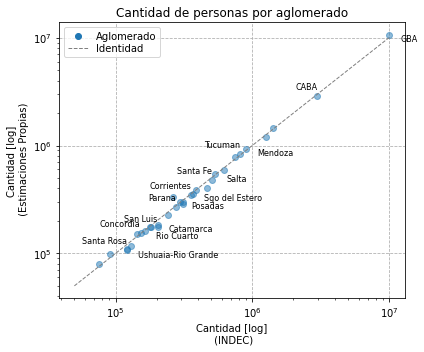

In [16]:
info = pd.concat([tabla_indec['poblacion_sum'], tabla.sum(1)], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
info.index = info.index.droplevel(0)

fig, ax = plt.subplots(1, figsize = (6, 5))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = ax, alpha = .5)

ax.plot([5e4, 1e7], [5e4, 1e7], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('INDEC')[2::4].iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'right', va = 'bottom', fontsize = 8)
for i, row in info.sort_values('INDEC')[3::4].iterrows():
    ax.annotate(i, (row[0]*1.2, row[1]/1.2), ha = 'left', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de personas por aglomerado')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Aglomerado')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

plt.tight_layout()
plt.savefig('./../images/pobreza5.png')
plt.show()


In [17]:
import seaborn as sns
import numpy as np

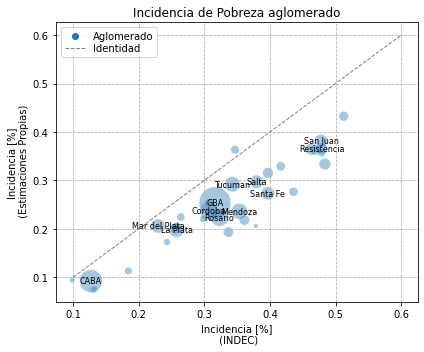

In [18]:
info = pd.concat([tabla_indec['pobreza_mean'], 
                  tabla[True].div(tabla.sum(1), 1),
                 np.sqrt(tabla_indec['poblacion_sum'])], axis = 1).dropna()#.sum()
info.index = info.index.droplevel(0)
info.columns = ['INDEC', 'MI', 'poblacion']
fig, ax = plt.subplots(1, figsize = (6, 5))

# info.plot(x = 'INDEC', y = 'MI', size = 'poblacion', marker = 'o', lw = 0, ax = axs)
sns.scatterplot(data=info, x="INDEC", y="MI", size="poblacion", legend=False, sizes=(20, 1000), alpha = .4)

ax.plot([.1, .6], [.1, .6], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('poblacion').tail(12).iterrows():
    ax.annotate(i, (row[0], row[1]), ha = 'center', va = 'center', fontsize = 8)

## Plot Format
ax.set_title('Incidencia de Pobreza aglomerado')
ax.grid(linestyle = '--') # Grid

# Formatos de ejes X, Y
ax.set_xlabel('Incidencia [%]\n (INDEC)'); ax.set_ylabel('Incidencia [%]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Aglomerado')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

plt.tight_layout()
plt.savefig('./../images/pobreza6.png')
plt.show()


## Por PROVINCIAS

In [19]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'NOMPROV'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e3, 1), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (miles)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'PROVINCIA'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_.stack(0).T)

### Pobreza

Pobreza                                    False                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                             11759.9           75.6   
Catamarca                                  231.5           61.9   
Chaco                                      530.3           50.0   
Chubut                                     395.1           80.1   
Ciudad Autónoma de Buenos Aires           2611.8           90.8   
Corrientes                                 530.6           53.1   
Córdoba                                   2447.0           74.0   
Entre Ríos                                 845.2           67.8   
Formosa                                    260.2           48.7   
Jujuy                                      405.9           61.1   
La Pampa                                   246.5           77.9   
La Rioja                                   201.9           61.0   
Mendoza                                   1193.2           69.4   
Misiones                                   567.0           51.5   
Neuquén                                    420.1           77.1   
Río Negro                                  482.7           77.2   
Salta                                      698.5           57.8   
San Juan                                   384.8           57.1   
San Luis                                   289.9           67.7   
Santa Cruz                                 228.8           83.6   
Santa Fe                                  2330.2           73.8   
Santiago del Estero                        454.1           52.1   
Tierra del Fuego                           112.7           89.2   
Tucumán                                    928.9           62.4   

Pobreza                                     True                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                              3786.8           24.4   
Catamarca                                  142.3           38.1   
Chaco                                      530.0           50.0   
Chubut                                      98.0           19.9   
Ciudad Autónoma de Buenos Aires            264.5            9.2   
Corrientes                                 468.1           46.9   
Córdoba                                    860.6           26.0   
Entre Ríos                                 401.7           32.2   
Formosa                                    273.8           51.3   
Jujuy                                      258.9           38.9   
La Pampa                                    70.1           22.1   
La Rioja                                   129.2           39.0   
Mendoza                                    526.4           30.6   
Misiones                                   534.9           48.5   
Neuquén                                    124.5           22.9   
Río Negro                                  142.7           22.8   
Salta                                      510.4           42.2   
San Juan                                   288.7           42.9   
San Luis                                   138.4           32.3   
Santa Cruz                                  44.9           16.4   
Santa Fe                                   827.8           26.2   
Santiago del Estero                        417.9           47.9   
Tierra del Fuego                            13.7           10.8   
Tucumán                                    559.4           37.6   

Pobreza                                    TOTAL                 
                                Cantidad (miles) Porcentaje (%)  
PROVINCIA                                                        
Buenos Aires                             15546.7          100.0  
Catamarca                                  373.8          100.0  
Chaco                                     1060.3  

### Indigencia

Indigencia                                 False                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                             14649.1           94.2   
Catamarca                                  328.8           88.0   
Chaco                                      857.2           80.8   
Chubut                                     463.6           94.0   
Ciudad Autónoma de Buenos Aires           2803.7           97.5   
Corrientes                                 827.0           82.8   
Córdoba                                   3100.5           93.7   
Entre Ríos                                1123.9           90.1   
Formosa                                    443.0           83.0   
Jujuy                                      587.2           88.3   
La Pampa                                   299.0           94.5   
La Rioja                                   303.8           91.8   
Mendoza                                   1605.5           93.4   
Misiones                                   911.5           82.7   
Neuquén                                    510.4           93.7   
Río Negro                                  584.7           93.5   
Salta                                     1035.2           85.6   
San Juan                                   591.5           87.8   
San Luis                                   397.3           92.8   
Santa Cruz                                 265.1           96.9   
Santa Fe                                  2930.6           92.8   
Santiago del Estero                        712.1           81.7   
Tierra del Fuego                           123.2           97.4   
Tucumán                                   1309.7           88.0   

Indigencia                                  True                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                               897.6            5.8   
Catamarca                                   45.0           12.0   
Chaco                                      203.2           19.2   
Chubut                                      29.5            6.0   
Ciudad Autónoma de Buenos Aires             72.6            2.5   
Corrientes                                 171.6           17.2   
Córdoba                                    207.1            6.3   
Entre Ríos                                 123.0            9.9   
Formosa                                     91.0           17.0   
Jujuy                                       77.6           11.7   
La Pampa                                    17.6            5.5   
La Rioja                                    27.3            8.2   
Mendoza                                    114.1            6.6   
Misiones                                   190.4           17.3   
Neuquén                                     34.2            6.3   
Río Negro                                   40.7            6.5   
Salta                                      173.7           14.4   
San Juan                                    82.0           12.2   
San Luis                                    31.0            7.2   
Santa Cruz                                   8.6            3.1   
Santa Fe                                   227.2            7.2   
Santiago del Estero                        159.9           18.3   
Tierra del Fuego                             3.2            2.6   
Tucumán                                    178.6           12.0   

Indigencia                                 TOTAL                 
                                Cantidad (miles) Porcentaje (%)  
PROVINCIA                                                        
Buenos Aires                             15546.7          100.0  
Catamarca                                  373.8          100.0  
Chaco                                     1060.4  